# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-07-28 06:01:05.821141


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 7/27/20


,7/27/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,4290259,148011,3.45
Brazil,2442375,87618,3.59
United Kingdom,301708,45844,15.19
Mexico,395489,44022,11.13
Italy,246286,35112,14.26
India,1480073,33408,2.26
France,220352,30212,13.71


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 7/27/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
32521,US,4178970,2020-07-25,146465.0,905.0,66439.0,66793.857143
32520,US,4112531,2020-07-24,145560.0,1130.0,73715.0,66402.285714
32519,US,4038816,2020-07-23,144430.0,1114.0,68695.0,66094.142857
32518,US,3970121,2020-07-22,143316.0,1195.0,70910.0,67317.000000
32517,US,3899211,2020-07-21,142121.0,1096.0,64534.0,66805.285714
32516,US,3834677,2020-07-20,141025.0,491.0,61417.0,67217.142857
32515,US,3773260,2020-07-19,140534.0,415.0,61847.0,66902.571429


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 7/27/20


,7/27/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,412344,32645.0,7.92
New Jersey,179812,15804.0,8.79
Massachusetts,115926,8536.0,7.36
California,458121,8494.0,1.85
Illinois,173894,7608.0,4.38
Pennsylvania,112995,7131.0,6.31
Michigan,87173,6405.0,7.35


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 7/27/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1125,California,446452,2020-07-25,8408.0,71.0,6267.0,9386.714286
1124,California,440185,2020-07-24,8337.0,136.0,9412.0,9560.857143
1123,California,430773,2020-07-23,8201.0,154.0,9487.0,9438.142857
1122,California,421286,2020-07-22,8047.0,159.0,11981.0,9485.857143
1121,California,409305,2020-07-21,7888.0,118.0,11435.0,9013.428571
1120,California,397870,2020-07-20,7770.0,55.0,10964.0,9216.142857
1119,California,386906,2020-07-19,7715.0,13.0,6161.0,8909.000000


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' COVID-19 cases by county as of', mostrecentdatecases)
casessummary



Number of confirmed California COVID-19 cases by county as of 7/27/20


,7/27/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,176028,4375.0,2.49
Riverside,33467,637.0,1.90
Orange,34646,566.0,1.63
San Diego,27507,533.0,1.94
San Bernardino,27992,383.0,1.37
Santa Clara,9215,184.0,2.00
Imperial,9162,181.0,1.98


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 7/27/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
3569,Los Angeles,172325,2020-07-25,4351.0,51.0,3390.0,2739.000000
3568,Los Angeles,168935,2020-07-24,4300.0,37.0,2067.0,2644.428571
3567,Los Angeles,166868,2020-07-23,4263.0,48.0,1734.0,2741.428571
3566,Los Angeles,165134,2020-07-22,4215.0,60.0,3109.0,3132.428571
3565,Los Angeles,162025,2020-07-21,4155.0,51.0,2980.0,3064.142857
3564,Los Angeles,159045,2020-07-20,4104.0,8.0,3128.0,3241.142857
3563,Los Angeles,155917,2020-07-19,4096.0,12.0,2765.0,3195.428571
3562,Los Angeles,153152,2020-07-18,4084.0,36.0,2728.0,3251.142857
3561,Los Angeles,150424,2020-07-17,4048.0,59.0,2746.0,3283.571429
3560,Los Angeles,147678,2020-07-16,3989.0,46.0,4471.0,3240.857143



7 day new US cases as of 7/27/20


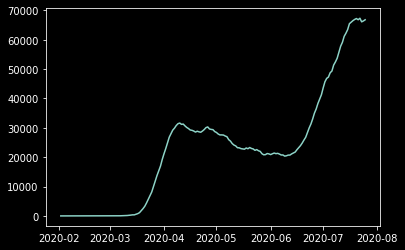

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 7/27/20


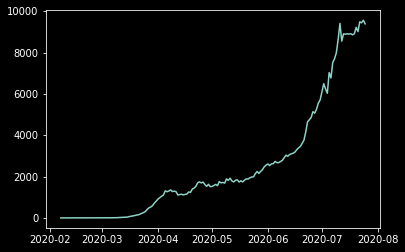

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 7/27/20


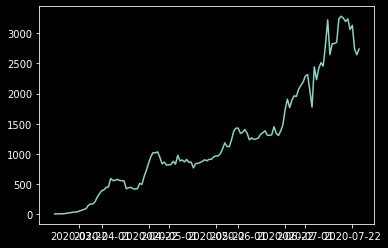

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(countyDataTA["Rolling7Average"])

plt.show()